In [ ]:
# Import packages and load plays and week 1 csv
from pathlib import Path
import pandas as pd
import numpy as np

BASE_DIR = Path().resolve().parent
DATA_PROCESSED = BASE_DIR / "data" / "processed"
DataRaw = BASE_DIR / "data" / "raw"
PLAYS = BASE_DIR/ "data" / "Processed"
GAMES = BASE_DIR/ "data" / "Processed"


tracking = pd.read_csv(DataRaw / "tracking_week_1.csv")
plays = pd.read_csv(PLAYS / "plays.csv")
games = pd.read_csv(GAMES / "games.csv")

In [2]:
# inspect
display(tracking)
display(plays)
display(games)

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022091200,64,35459.0,Kareem Jackson,1,BEFORE_SNAP,2022-09-13 00:16:03.5,22.0,DEN,right,51.06,28.55,0.72,0.37,0.07,246.17,68.34,huddle_break_offense
1,2022091200,64,35459.0,Kareem Jackson,2,BEFORE_SNAP,2022-09-13 00:16:03.6,22.0,DEN,right,51.13,28.57,0.71,0.36,0.07,245.41,71.21,NaN
2,2022091200,64,35459.0,Kareem Jackson,3,BEFORE_SNAP,2022-09-13 00:16:03.7,22.0,DEN,right,51.20,28.59,0.69,0.23,0.07,244.45,69.90,NaN
3,2022091200,64,35459.0,Kareem Jackson,4,BEFORE_SNAP,2022-09-13 00:16:03.8,22.0,DEN,right,51.26,28.62,0.67,0.22,0.07,244.45,67.98,NaN
4,2022091200,64,35459.0,Kareem Jackson,5,BEFORE_SNAP,2022-09-13 00:16:03.9,22.0,DEN,right,51.32,28.65,0.65,0.34,0.07,245.74,62.83,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104695,2022090800,3696,NaN,football,171,AFTER_SNAP,2022-09-09 03:07:37.7,NaN,football,left,1.70,0.62,14.42,5.36,1.47,NaN,NaN,pass_outcome_incomplete
7104696,2022090800,3696,NaN,football,172,AFTER_SNAP,2022-09-09 03:07:37.8,NaN,football,left,0.59,0.01,3.60,0.06,1.27,NaN,NaN,NaN
7104697,2022090800,3696,NaN,football,173,AFTER_SNAP,2022-09-09 03:07:37.9,NaN,football,left,0.23,-0.07,3.60,0.23,0.38,NaN,NaN,NaN
7104698,2022090800,3696,NaN,football,174,AFTER_SNAP,2022-09-09 03:07:38,NaN,football,left,-0.13,-0.17,3.63,0.06,0.37,NaN,NaN,NaN


,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone
0,2022102302,2655,(1:54) (Shotgun) J.Burrow pass short middle to...,3,1,10,CIN,ATL,CIN,21,...,9,0.004634,-0.004634,0.702717,True,NaN,NaN,0,Cover-3,Zone
1,2022091809,3698,(2:13) (Shotgun) J.Burrow pass short right to ...,4,1,10,CIN,DAL,CIN,8,...,4,0.002847,-0.002847,-0.240509,True,NaN,NaN,0,Quarters,Zone
2,2022103004,3146,(2:00) (Shotgun) D.Mills pass short right to D...,4,3,12,HOU,TEN,HOU,20,...,6,0.000205,-0.000205,-0.218480,True,NaN,NaN,0,Quarters,Zone
3,2022110610,348,(9:28) (Shotgun) P.Mahomes pass short left to ...,1,2,10,KC,TEN,TEN,23,...,4,-0.001308,0.001308,-0.427749,True,NaN,NaN,0,Quarters,Zone
4,2022102700,2799,(2:16) (Shotgun) L.Jackson up the middle to TB...,3,2,8,BAL,TB,TB,27,...,-1,0.027141,-0.027141,-0.638912,False,MAN,READ OPTION,0,Cover-1,Man
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16119,2022110604,1051,(12:49) (Shotgun) T.Lawrence pass incomplete s...,2,3,4,JAX,LV,JAX,31,...,0,-0.024741,0.024741,-1.391687,True,NaN,NaN,0,Cover-2,Zone
16120,2022103005,3492,(12:32) (Shotgun) K.Cousins pass incomplete de...,4,1,10,MIN,ARI,MIN,25,...,0,-0.026580,0.026580,-0.503208,True,NaN,NaN,0,Cover-3,Zone
16121,2022092502,2337,(9:59) (Shotgun) P.Mahomes scrambles right end...,3,1,10,KC,IND,IND,13,...,10,-0.013790,0.013790,1.073898,True,NaN,NaN,0,Quarters,Zone
16122,2022091809,719,(:45) C.Rush pass incomplete deep right to C.L...,1,1,10,DAL,CIN,CIN,47,...,0,-0.011561,0.011561,-0.522397,True,UNDEFINED,NaN,0,Cover-3,Zone


,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,9/8/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,9/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,9/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,9/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,9/11/2022,13:00:00,CIN,PIT,20,23
...,...,...,...,...,...,...,...,...,...
131,2022110607,2022,9,11/6/2022,13:00:00,WAS,MIN,17,20
132,2022110608,2022,9,11/6/2022,16:05:00,ARI,SEA,21,31
133,2022110609,2022,9,11/6/2022,16:25:00,TB,LA,16,13
134,2022110610,2022,9,11/6/2022,20:20:00,KC,TEN,20,17


In [3]:
# merge "week" from games.csv to plays
plays = plays.merge(
    games[["gameId", "week"]],
    on="gameId",
    how="left"
)


In [4]:
# checking to see if plays made it
display(plays)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone,week
0,2022102302,2655,(1:54) (Shotgun) J.Burrow pass short middle to...,3,1,10,CIN,ATL,CIN,21,...,0.004634,-0.004634,0.702717,True,NaN,NaN,0,Cover-3,Zone,7
1,2022091809,3698,(2:13) (Shotgun) J.Burrow pass short right to ...,4,1,10,CIN,DAL,CIN,8,...,0.002847,-0.002847,-0.240509,True,NaN,NaN,0,Quarters,Zone,2
2,2022103004,3146,(2:00) (Shotgun) D.Mills pass short right to D...,4,3,12,HOU,TEN,HOU,20,...,0.000205,-0.000205,-0.218480,True,NaN,NaN,0,Quarters,Zone,8
3,2022110610,348,(9:28) (Shotgun) P.Mahomes pass short left to ...,1,2,10,KC,TEN,TEN,23,...,-0.001308,0.001308,-0.427749,True,NaN,NaN,0,Quarters,Zone,9
4,2022102700,2799,(2:16) (Shotgun) L.Jackson up the middle to TB...,3,2,8,BAL,TB,TB,27,...,0.027141,-0.027141,-0.638912,False,MAN,READ OPTION,0,Cover-1,Man,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16119,2022110604,1051,(12:49) (Shotgun) T.Lawrence pass incomplete s...,2,3,4,JAX,LV,JAX,31,...,-0.024741,0.024741,-1.391687,True,NaN,NaN,0,Cover-2,Zone,9
16120,2022103005,3492,(12:32) (Shotgun) K.Cousins pass incomplete de...,4,1,10,MIN,ARI,MIN,25,...,-0.026580,0.026580,-0.503208,True,NaN,NaN,0,Cover-3,Zone,8
16121,2022092502,2337,(9:59) (Shotgun) P.Mahomes scrambles right end...,3,1,10,KC,IND,IND,13,...,-0.013790,0.013790,1.073898,True,NaN,NaN,0,Quarters,Zone,3
16122,2022091809,719,(:45) C.Rush pass incomplete deep right to C.L...,1,1,10,DAL,CIN,CIN,47,...,-0.011561,0.011561,-0.522397,True,UNDEFINED,NaN,0,Cover-3,Zone,2


In [5]:
# Extracting offense, defense, and week from plays
plays2 = plays[["gameId", "playId", "possessionTeam", "defensiveTeam", "week"]].copy()
plays2.head()


,gameId,playId,possessionTeam,defensiveTeam,week
0,2022102302,2655,CIN,ATL,7
1,2022091809,3698,CIN,DAL,2
2,2022103004,3146,HOU,TEN,8
3,2022110610,348,KC,TEN,9
4,2022102700,2799,BAL,TB,8


In [6]:
# restricting tracking to just week 1 plays
# specify new variable to week, and extract just week 1, merge week 1 plays to tracking
wk = 1
playsWk = plays2[plays2["week"] == wk].copy()

tracking = tracking.merge(playsWk, on = ["gameId", "playId"], how = "inner")
tracking.shape

(7104700, 21)

In [7]:
# find plays with "man_in_motion", just capture the the single play
# playId and gameId shows for multiple frames
MotionPlays = (
    tracking.loc[tracking["event"].eq("man_in_motion"), ["gameId", "playId"]]
    .drop_duplicates()
)

MotionPlays.head()

,gameId,playId
64,2022091200,64
3842,2022091200,85
22978,2022091200,264
31606,2022091200,315
37487,2022091200,346


In [8]:
# creating bounds per play to be line_set, motion_start, ball_snap
# merge motionplays on the tracking data to be able to capture the bounds in events column
bounds = tracking.merge(MotionPlays, on = ["gameId", "playId"], how = "inner")

# Bounds for line set
LineSet = (
    bounds.loc[bounds["event"].eq("line_set"), ["gameId", "playId", "frameId"]]
    .dropna()
    .groupby(["gameId", "playId"], as_index = False)["frameId"].min()
    .rename(columns = {"frameId": "line_set_frame"})
)

# Bounds for ball snap
BallSnap = (
    bounds.loc[bounds["event"].eq("ball_snap"), ["gameId", "playId", "frameId"]]
    .dropna()
    .groupby(["gameId", "playId"], as_index = False)["frameId"].min()
    .rename(columns = {"frameId": "ball_snap_frame"})
)

# Bounds for motion start
MotionStart = (
    bounds.loc[bounds["event"].eq("man_in_motion"), ["gameId", "playId", "frameId"]]
    .dropna()
    .groupby(["gameId", "playId"], as_index = False)["frameId"].min()
    .rename(columns = {"frameId": "motion_start_frame"})
)

# creating the window for the play
PlayWindow = (
    LineSet.merge(MotionStart, on = ["gameId", "playId"], how = "inner")
    .merge(BallSnap, on = ["gameId", "playId"], how = "inner")
).copy()

# make sure the order of events is correct, keep if motion happens before snap, AND after line snap
PlayWindow = PlayWindow[
    (PlayWindow["ball_snap_frame"] > PlayWindow["line_set_frame"]) &
    (PlayWindow["motion_start_frame"] < PlayWindow["ball_snap_frame"])
].copy()

# define full presnap window
PlayWindow["window_start_frame"] = PlayWindow[["line_set_frame", "motion_start_frame"]].min(axis=1)
PlayWindow["window_end_frame"] = PlayWindow["ball_snap_frame"]

PlayWindow.head()

,gameId,playId,line_set_frame,motion_start_frame,ball_snap_frame,window_start_frame,window_end_frame
0,2022090800,80,23,61,88,23,88
1,2022090800,101,46,97,106,46,106
2,2022090800,212,79,95,104,79,104
3,2022090800,236,51,84,93,51,93
4,2022090800,299,61,146,153,61,153


In [9]:
# Creating a loop for summary statistics 

rows = []

# Creating threshold of 1.5 yards moved to count as a "defender moved"
threshold = 1.5

# for loop, for each column
for _, r in PlayWindow.iterrows():
    gid = int(r["gameId"])
    pid = int(r["playId"])
    ls = int(r["line_set_frame"])
    ms = int(r["motion_start_frame"])
    bs = int(r["ball_snap_frame"])
    ws = int(r["window_start_frame"])
    we = int(r["window_end_frame"])

    # distinguishing the game and play
    play = bounds[(bounds["gameId"] == gid) & (bounds["playId"] == pid)].copy()

    # offense and defense on the field
    OffTeam = play["possessionTeam"].iloc[0]
    DefTeam = play["defensiveTeam"].iloc[0]

    # Presnap window (motion start to snap) for offensive players
    off = play[
        (play["club"] == OffTeam) &
        (play["nflId"].notna()) &
        (play["frameId"].between(ms, bs, inclusive = "both"))
    ].copy()

    if off.empty:
        continue

    off = off.sort_values(["nflId", "frameId"])

    # identify motion player by x and y displacement (start to end)
    firstXY = off.groupby("nflId")[["x", "y"]].first()
    lastXY = off.groupby("nflId")[["x", "y"]].last()
    disp = np.sqrt((lastXY["x"] - firstXY["x"])**2 + (lastXY["y"] - firstXY["y"])**2)

    motionID = int(disp.sort_values(ascending = False).index[0])

    # creating a motion trail for the player in motion
    trail = play[
        (play["nflId"] == motionID) &
        (play["frameId"].between(ms, bs, inclusive = "both"))    
    ].sort_values("frameId")

    # Distance of the player in motion
    dx = trail["x"].diff()
    dy = trail["y"].diff()
    MotionDistance = float(np.sqrt(dx**2 + dy**2).sum())

    MotionDurationFrames = int(bs - ms)

    # Defense movement (displacement from motion start to ball snap)
    defense = play[
        (play["club"] == DefTeam) &
        (play["nflId"].notna()) &
        (play["frameId"].between(ms, bs, inclusive = "both"))
    ].copy()

    if defense.empty:
        NumDefMoved = np.nan
    else:
        defense = defense.sort_values(["nflId", "frameId"])
        dFirst = defense.groupby("nflId")[["x", "y"]].first()
        dLast = defense.groupby("nflId")[["x", "y"]].last()
        dDisp = np.sqrt((dLast["x"] - dFirst["x"])**2 + (dLast["y"] - dFirst["y"])**2)
        NumDefMoved = int((dDisp > threshold).sum())

    rows.append({
        "week": wk,
        "gameId": gid,
        "playId": pid,
        "offenseTeam": OffTeam,
        "defenseTeam": DefTeam,
        "line_set_frame": ls,
        "motion_start_frame": ms,
        "ball_snap_frame": bs,
        "motion_player_nflId": motionID,
        "motion_duration_frames": MotionDurationFrames,
        "motion_distance": MotionDistance,
        "num_defenders_moved_gt": NumDefMoved,
    })

In [10]:
# double checking the for loop
MotionSummary = pd.DataFrame(rows)
MotionSummary.head()

,week,gameId,playId,offenseTeam,defenseTeam,line_set_frame,motion_start_frame,ball_snap_frame,motion_player_nflId,motion_duration_frames,motion_distance,num_defenders_moved_gt
0,1,2022090800,80,BUF,LA,23,61,88,47857,27,10.168582,3
1,1,2022090800,101,BUF,LA,46,97,106,53079,9,1.975530,0
2,1,2022090800,212,BUF,LA,79,95,104,47879,9,5.802071,1
3,1,2022090800,236,BUF,LA,51,84,93,52536,9,3.134918,2
4,1,2022090800,299,LA,BUF,61,146,153,44881,7,4.127172,3


In [11]:
# double checking number of motion plays (sanity check to make sure correct #s) ~ 6
MotionSummary.shape

(664, 12)

In [12]:
# Sanity check #2
# number of line sets, ball snaps, and motion starts detected in events 
# Compared to MotionSummary, which has 664 motion plays, compared to 688 original detections
# so 24 plays were cut out, could be because the play is missing line set or ball snap
n_line_set = LineSet.shape[0]
n_ball_snap = BallSnap.shape[0]
n_motion_start = MotionStart.shape[0]

n_line_set, n_motion_start, n_ball_snap

(677, 688, 687)

In [13]:
# Creating a week range filter
StartWK =  1
EndWK = 1

MSFilt = MotionSummary[MotionSummary["week"].between(StartWK, EndWK)].copy()
MSFilt.shape

(664, 12)

In [14]:
# Calculate motion rate by team
# Denominator
PlaysRange = plays2[plays2["week"].between(StartWK, EndWK)].copy()

TotalPlaysByTeam = (
    PlaysRange.groupby("possessionTeam")
    .size()
    .rename("total_off_plays")
    .reset_index()
    .rename(columns = {"possessionTeam": "offenseTeam"})  
)

TotalPlaysByTeam.head()

,offenseTeam,total_off_plays
0,ARI,57
1,ATL,69
2,BAL,50
3,BUF,51
4,CAR,47


In [15]:
# Numerator
MotionPlaysByTeam = (
    MSFilt.groupby("offenseTeam")
    .size()
    .rename("MotionPlays")
    .reset_index()
)

MotionPlaysByTeam.head()

,offenseTeam,MotionPlays
0,ARI,9
1,ATL,35
2,BUF,29
3,CAR,1
4,CHI,35


In [16]:
# Motion rate table
MotionRate = TotalPlaysByTeam.merge(MotionPlaysByTeam, on = "offenseTeam", how = "left")
MotionRate["MotionPlays"] = MotionRate["MotionPlays"].fillna(0).astype(int)

MotionRate["MotionRate"] = MotionRate["MotionPlays"] / MotionRate["total_off_plays"]

MotionRate = MotionRate.sort_values("MotionRate", ascending = False)
MotionRate.head(10)

,offenseTeam,total_off_plays,MotionPlays,MotionRate
19,MIA,58,41,0.706897
5,CHI,53,35,0.660377
28,SF,64,41,0.640625
21,NE,52,33,0.634615
18,LV,55,34,0.618182
3,BUF,51,29,0.568627
20,MIN,56,29,0.517857
1,ATL,69,35,0.507246
26,PIT,58,26,0.448276
6,CIN,90,39,0.433333


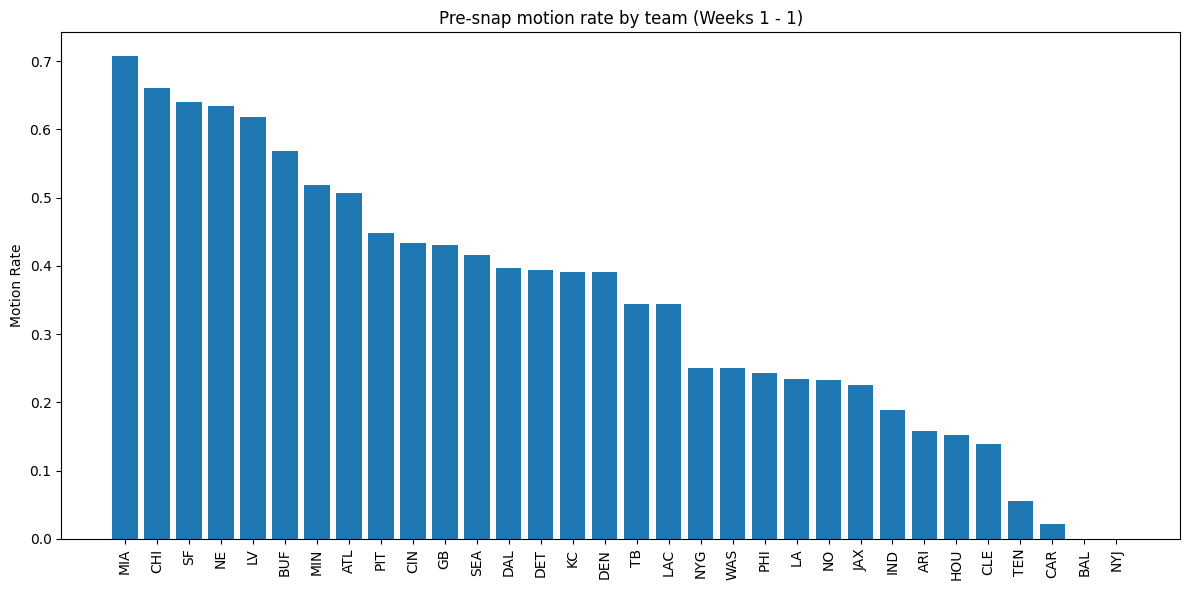

In [17]:
# bar chart of motion rate by team
import matplotlib.pyplot as plt

plt.figure(figsize = (12,6))
plt.bar(MotionRate["offenseTeam"], MotionRate["MotionRate"])
plt.xticks(rotation = 90)
plt.ylabel("Motion Rate")
plt.title(f"Pre-snap motion rate by team (Weeks {StartWK} - {EndWK})")
plt.tight_layout()
plt.show()

In [18]:
# double checking baltimore and jets both had 0 
MotionRate[MotionRate["offenseTeam"].isin(["BAL", "NYJ"])]

,offenseTeam,total_off_plays,MotionPlays,MotionRate
2,BAL,50,0,0.0
24,NYJ,72,0,0.0


In [19]:
# checking raw value
motion_events = bounds[["gameId","playId","possessionTeam"]].drop_duplicates()

motion_events_team = (
    motion_events.groupby("possessionTeam")
    .size()
    .reset_index(name="MotionEventPlays")
)

motion_events_team[motion_events_team["possessionTeam"].isin(["BAL","NYJ"])]

,possessionTeam,MotionEventPlays


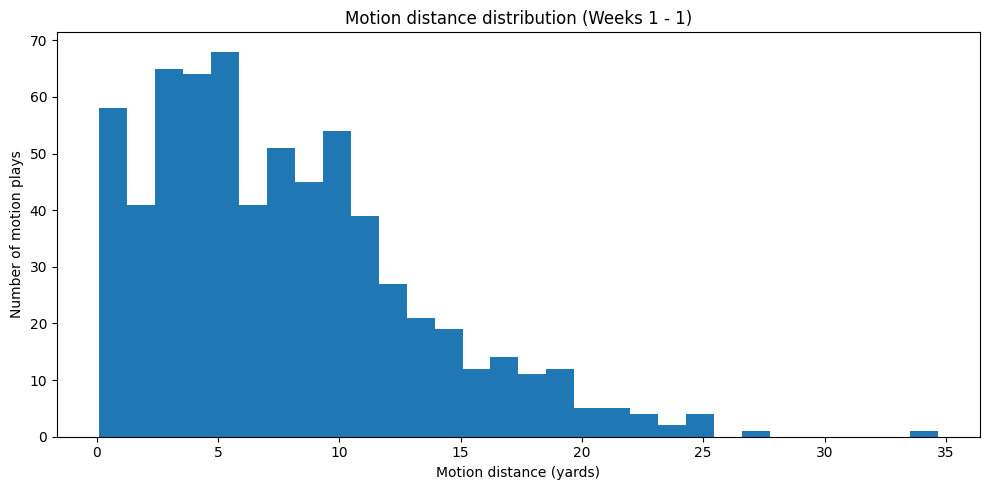

In [20]:
# Histogram of motion distance
plt.figure(figsize = (10,5))
plt.hist(MSFilt["motion_distance"].dropna(), bins = 30)
plt.xlabel("Motion distance (yards)")
plt.ylabel("Number of motion plays")
plt.title(f"Motion distance distribution (Weeks {StartWK} - {EndWK})")
plt.tight_layout()
plt.show()

In [21]:
# KPI summary stats 
# League motion dist median, league motion median duration, number defenders moved > 1.5 yards
LeagueMotionMedianDist = MSFilt["motion_distance"].median()
LeagueMotionMedianDura = MSFilt["motion_duration_frames"].median()
LeagueMedianDefMoved = MSFilt["num_defenders_moved_gt"].median()

LeagueMotionMedianDist, LeagueMedianDefMoved, LeagueMotionMedianDura

(np.float64(6.846420570063836), np.float64(2.0), np.float64(25.0))

In [22]:
# league motion rate
TotalOffPlays = len(PlaysRange)
MotionPlaysUsable = len(MSFilt)

LeagueMotionRateUsable = MotionPlaysUsable / TotalOffPlays
LeagueMotionRateUsable

0.3401639344262295

In [23]:
# expand to loop through all weeks 1-9
AllWeeksRows = []

# loop through weeks 1-9
# similar to for loop above

for wk in range(1, 10):
    print(f"Processing Week {wk}")

    # Load tracking for this week
    tracking = pd.read_csv(DataRaw / f"tracking_week_{wk}.csv")

    # merge plays info
    playsWk = plays2[plays2["week"] == wk].copy()

    trackingWK = tracking.merge(
        playsWk,
        on = ["gameId", "playId"],
        how = "inner"
    )

    # Find motion plays 
    MotionPlays = (
        trackingWK.loc[trackingWK["event"] == "man_in_motion",
                       ["gameId", "playId"]]
        .drop_duplicates() 
    )

    bounds = trackingWK.merge(MotionPlays, on = ["gameId", "playId"], how = "inner")

    # pasting exact same code from above (cell 10)
    # Bounds for line set
    LineSet = (
        bounds.loc[bounds["event"].eq("line_set"), ["gameId", "playId", "frameId"]]
        .dropna()
        .groupby(["gameId", "playId"], as_index = False)["frameId"].min()
        .rename(columns = {"frameId": "line_set_frame"})
    )

    # Bounds for ball snap
    BallSnap = (
        bounds.loc[bounds["event"].eq("ball_snap"), ["gameId", "playId", "frameId"]]
        .dropna()
        .groupby(["gameId", "playId"], as_index = False)["frameId"].min()
        .rename(columns = {"frameId": "ball_snap_frame"})
    )

    # Bounds for motion start
    MotionStart = (
        bounds.loc[bounds["event"].eq("man_in_motion"), ["gameId", "playId", "frameId"]]
        .dropna()
        .groupby(["gameId", "playId"], as_index = False)["frameId"].min()
        .rename(columns = {"frameId": "motion_start_frame"})
    )

    # creating the window for the play
    PlayWindow = (
        LineSet.merge(MotionStart, on = ["gameId", "playId"], how = "inner")
        .merge(BallSnap, on = ["gameId", "playId"], how = "inner")
    ).copy()

    # make sure the order of events is correct, keep if motion happens before snap, AND after line snap
    PlayWindow = PlayWindow[
        (PlayWindow["ball_snap_frame"] > PlayWindow["line_set_frame"]) &
        (PlayWindow["motion_start_frame"] < PlayWindow["ball_snap_frame"])
    ].copy()

    # define full presnap window
    PlayWindow["window_start_frame"] = PlayWindow[["line_set_frame", "motion_start_frame"]].min(axis=1)
    PlayWindow["window_end_frame"] = PlayWindow["ball_snap_frame"]


    # Create loop for summary statistics 

    # Creating threshold of 1.5 yards moved to count as a "defender moved"
    threshold = 1.5

    # for loop, for each column
    for _, r in PlayWindow.iterrows():
        gid = int(r["gameId"])
        pid = int(r["playId"])
        ls = int(r["line_set_frame"])
        ms = int(r["motion_start_frame"])
        bs = int(r["ball_snap_frame"])
        ws = int(r["window_start_frame"])
        we = int(r["window_end_frame"])

        # distinguishing the game and play
        play = bounds[(bounds["gameId"] == gid) & (bounds["playId"] == pid)].copy()

        # offense and defense on the field
        OffTeam = play["possessionTeam"].iloc[0]
        DefTeam = play["defensiveTeam"].iloc[0]

        # Presnap window (motion start to snap) for offensive players
        off = play[
            (play["club"] == OffTeam) &
            (play["nflId"].notna()) &
            (play["frameId"].between(ms, bs, inclusive = "both"))
        ].copy()

        if off.empty:
            continue

        off = off.sort_values(["nflId", "frameId"])

        # identify motion player by x and y displacement (start to end)
        firstXY = off.groupby("nflId")[["x", "y"]].first()
        lastXY = off.groupby("nflId")[["x", "y"]].last()
        disp = np.sqrt((lastXY["x"] - firstXY["x"])**2 + (lastXY["y"] - firstXY["y"])**2)

        motionID = int(disp.sort_values(ascending = False).index[0])

        # creating a motion trail for the player in motion
        trail = play[
            (play["nflId"] == motionID) &
            (play["frameId"].between(ms, bs, inclusive = "both"))    
        ].sort_values("frameId")

        # Distance of the player in motion
        dx = trail["x"].diff()
        dy = trail["y"].diff()
        MotionDistance = float(np.sqrt(dx**2 + dy**2).sum())

        MotionDurationFrames = int(bs - ms)

        # Defense movement (displacement from motion start to ball snap)
        defense = play[
            (play["club"] == DefTeam) &
            (play["nflId"].notna()) &
            (play["frameId"].between(ms, bs, inclusive = "both"))
        ].copy()

        if defense.empty:
            NumDefMoved = np.nan
        else:
            defense = defense.sort_values(["nflId", "frameId"])
            dFirst = defense.groupby("nflId")[["x", "y"]].first()
            dLast = defense.groupby("nflId")[["x", "y"]].last()
            dDisp = np.sqrt((dLast["x"] - dFirst["x"])**2 + (dLast["y"] - dFirst["y"])**2)
            NumDefMoved = int((dDisp > threshold).sum())

        AllWeeksRows.append({
            "week": wk,
            "gameId": gid,
            "playId": pid,
            "offenseTeam": OffTeam,
            "defenseTeam": DefTeam,
            "line_set_frame": ls,
            "motion_start_frame": ms,
            "ball_snap_frame": bs,
            "motion_player_nflId": motionID,
            "motion_duration_frames": MotionDurationFrames,
            "motion_distance": MotionDistance,
            "num_defenders_moved_gt": NumDefMoved,
        })

# build final df after loop finishes
MotionSummaryAll = pd.DataFrame(AllWeeksRows)
MotionSummaryAll.shape
    


Processing Week 1
Processing Week 2
Processing Week 3
Processing Week 4
Processing Week 5
Processing Week 6
Processing Week 7
Processing Week 8
Processing Week 9


(5055, 12)

In [24]:
MotionSummaryAll["week"].value_counts().sort_index()

week
1    664
2    560
3    540
4    633
5    482
6    577
7    562
8    584
9    453
Name: count, dtype: int64

In [25]:
# double checking MSfilt shape
start_wk = 1
end_wk = 9

MSFilt = MotionSummaryAll[MotionSummaryAll["week"].between(start_wk, end_wk)].copy()
MSFilt.shape

(5055, 12)

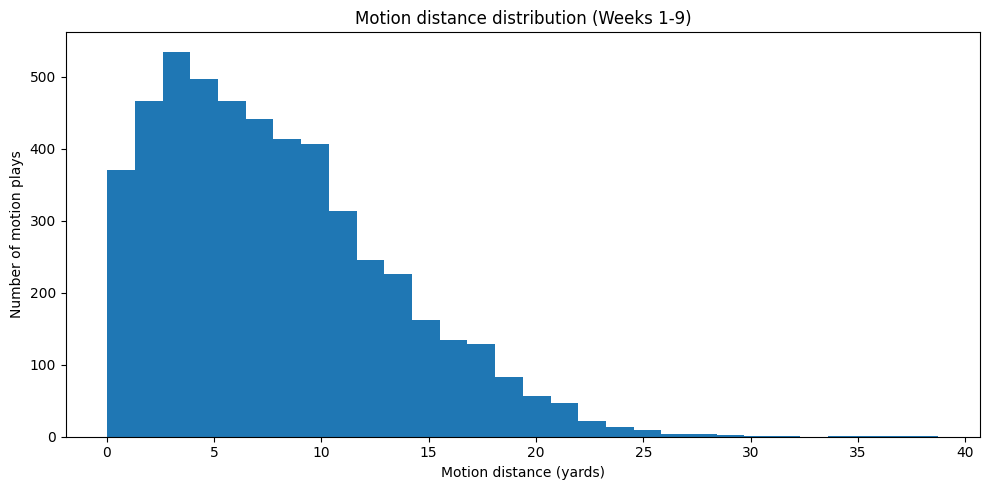

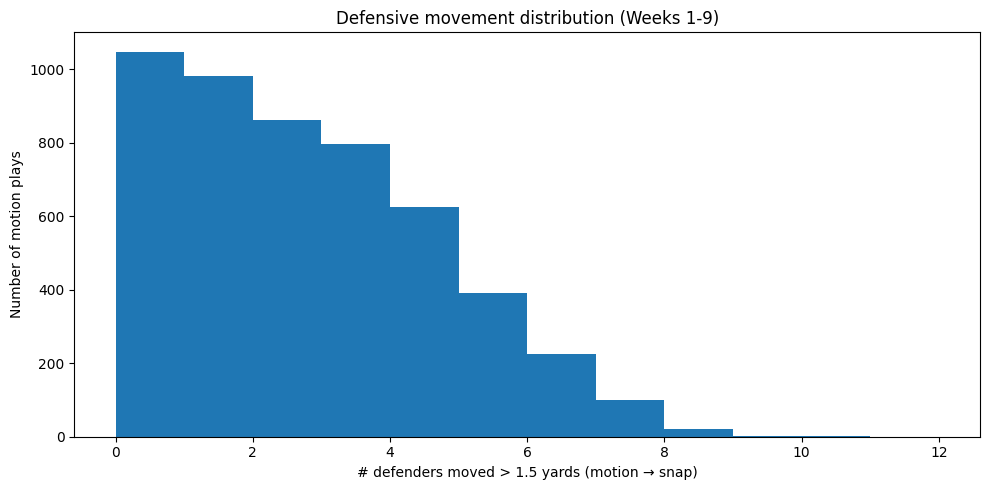

In [26]:
# checking the data out
plt.figure(figsize=(10,5))
plt.hist(MSFilt["motion_distance"].dropna(), bins=30)
plt.xlabel("Motion distance (yards)")
plt.ylabel("Number of motion plays")
plt.title(f"Motion distance distribution (Weeks {start_wk}-{end_wk})")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.hist(MSFilt["num_defenders_moved_gt"].dropna(), bins=range(0, 13))
plt.xlabel("# defenders moved > 1.5 yards (motion → snap)")
plt.ylabel("Number of motion plays")
plt.title(f"Defensive movement distribution (Weeks {start_wk}-{end_wk})")
plt.tight_layout()
plt.show()

In [27]:
# Creating a weeks 1-9 motion rate by team 
# Choose week range, filter plays, and filter motion summary

start_wk = 1
end_wk = 9

# all offensive plays in range(denominator)
PlaysRange = plays2[plays2["week"].between(start_wk, end_wk)].copy()

# usable motion plays in range (numerator)
MSFilt = MotionSummaryAll[MotionSummaryAll["week"].between(start_wk, end_wk)].copy()

PlaysRange.shape, MSFilt.shape

((16124, 5), (5055, 12))

In [28]:
# denominator ~ total offensive plays by team
TotalPlaysByTeam = (
    PlaysRange.groupby("possessionTeam")
    .size()
    .reset_index(name = "TotalOffPlays")
    .rename(columns = {"possessionTeam": "offenseTeam"})
)

TotalPlaysByTeam.head()


,offenseTeam,TotalOffPlays
0,ARI,569
1,ATL,511
2,BAL,517
3,BUF,469
4,CAR,458


In [29]:
# now numerator ~ motions plays by team
MotionPlaysByTeam = (
    MSFilt.groupby("offenseTeam")
    .size()
    .reset_index(name = "MotionPlays")
)

MotionPlaysByTeam.head()

,offenseTeam,MotionPlays
0,ARI,128
1,ATL,257
2,BAL,143
3,BUF,87
4,CAR,99


In [30]:
# Motion rate table
MotionRate = TotalPlaysByTeam.merge(MotionPlaysByTeam, on = "offenseTeam", how = "left")
MotionRate["MotionPlays"] = MotionRate["MotionPlays"].fillna(0).astype(int)

MotionRate["MotionRate"] = MotionRate["MotionPlays"] / MotionRate["TotalOffPlays"]
MotionRate = MotionRate.sort_values("MotionRate", ascending = False)

MotionRate.head(32)

,offenseTeam,TotalOffPlays,MotionPlays,MotionRate
28,SF,454,237,0.522026
19,MIA,517,269,0.520309
1,ATL,511,257,0.502935
5,CHI,510,245,0.480392
10,DET,480,218,0.454167
7,CLE,512,212,0.414062
20,MIN,483,199,0.412008
16,LA,466,180,0.386266
17,LAC,499,180,0.360721
15,KC,527,185,0.351044


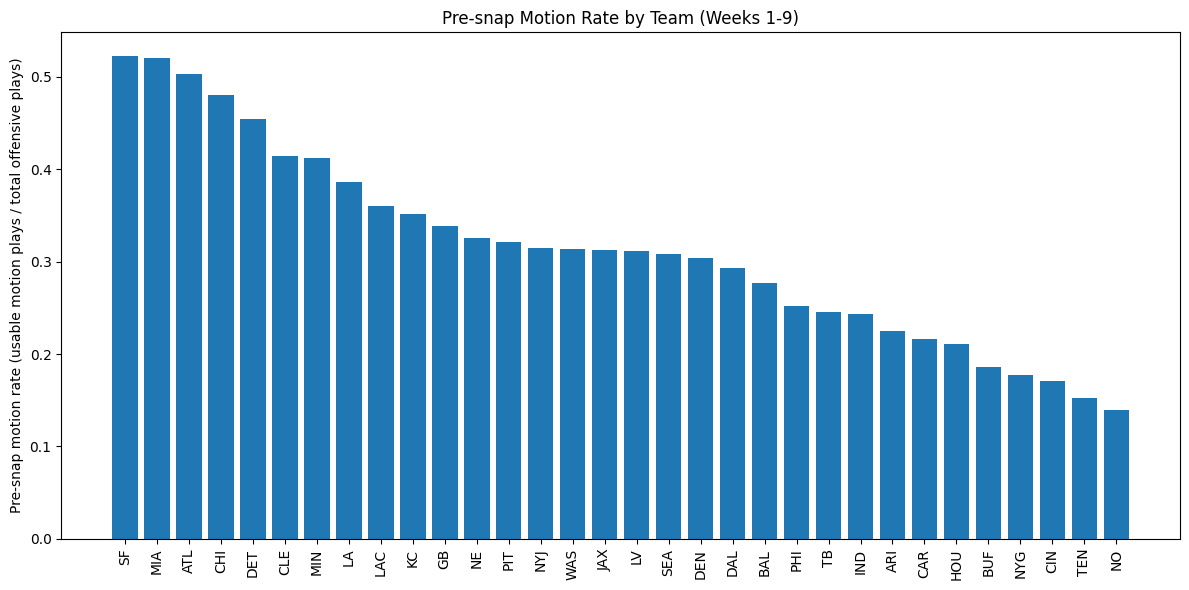

In [31]:
# see bar chart
plt.figure(figsize=(12,6))
plt.bar(MotionRate["offenseTeam"], MotionRate["MotionRate"])
plt.xticks(rotation=90)
plt.ylabel("Pre-snap motion rate (usable motion plays / total offensive plays)")
plt.title(f"Pre-snap Motion Rate by Team (Weeks {start_wk}-{end_wk})")
plt.tight_layout()
plt.show()

In [32]:
# league level motion rate
LeagueMotionRateUsable = len(MSFilt) / len(PlaysRange)
LeagueMotionRateUsable

0.3135078144381047

In [33]:
# Create league KPI summary ~ going to use for streamlit dashboard
kpi = {
    "League Motion Rate": len(MSFilt) / len(PlaysRange),
    "Median Motion Distance": MSFilt["motion_distance"].median(),
    "Median Motion Duration (frames)": MSFilt["motion_duration_frames"].median(),
    "Median Defenders Moved (>1.5y)": MSFilt["num_defenders_moved_gt"].median()
}

kpi


{'League Motion Rate': 0.3135078144381047,
 'Median Motion Distance': np.float64(7.014737690407837),
 'Median Motion Duration (frames)': np.float64(25.0),
 'Median Defenders Moved (>1.5y)': np.float64(2.0)}

In [34]:
# lets create bar chart with teams
# also adding context by showing league average
LeagueAverageMotion = MotionRate["MotionRate"].mean()
LeagueAverageMotion

np.float64(0.31382005730990387)

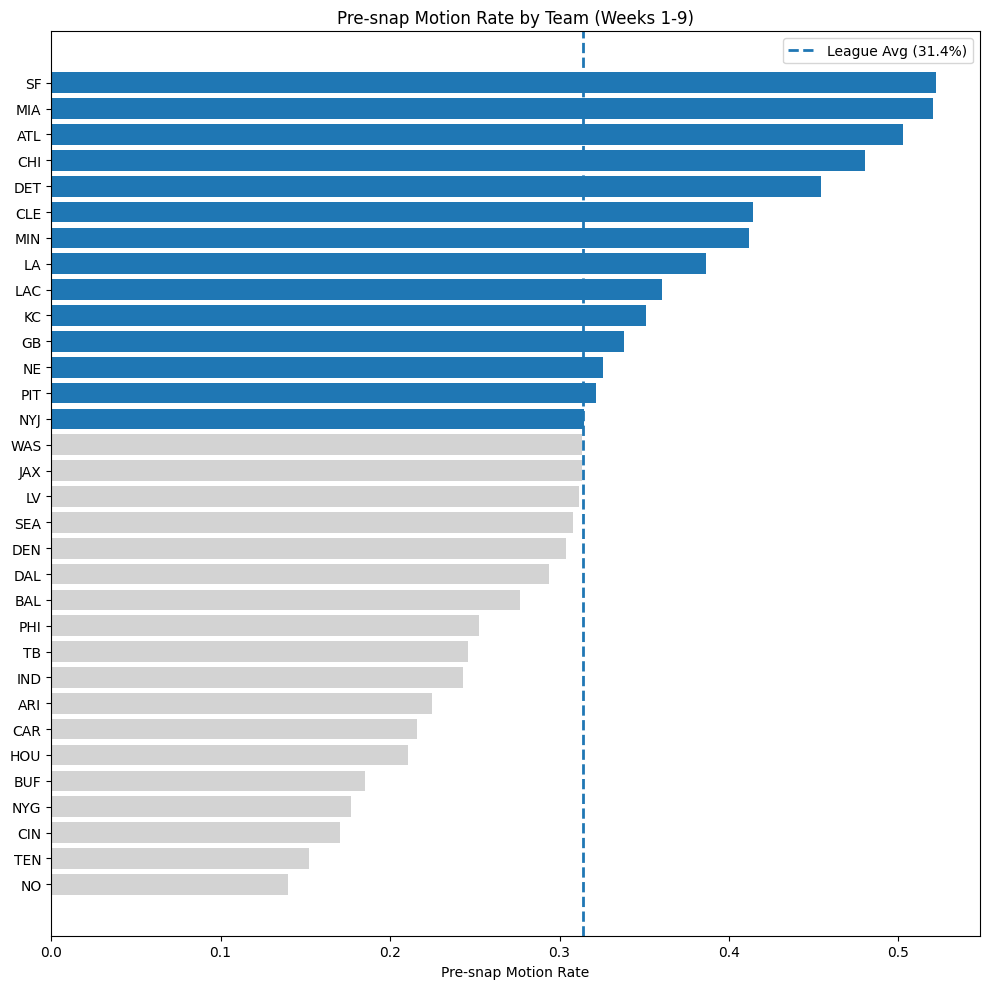

In [35]:
# plot league bar chart
plt.figure(figsize=(10,10))

# sort for readability
mr = MotionRate.sort_values("MotionRate")

plt.barh(mr["offenseTeam"], mr["MotionRate"])

# League average reference line
plt.axvline(
    LeagueAverageMotion,
    linestyle="--",
    linewidth=2,
    label=f"League Avg ({LeagueAverageMotion:.1%})"
)
colors = ["tab:blue" if x >= LeagueAverageMotion else "lightgray"
          for x in mr["MotionRate"]]

plt.barh(mr["offenseTeam"], mr["MotionRate"], color=colors)
plt.xlabel("Pre-snap Motion Rate")
plt.title(f"Pre-snap Motion Rate by Team (Weeks {start_wk}-{end_wk})")

plt.legend()
plt.tight_layout()
plt.show()

In [36]:
# Lets see basic data stats
MotionRate.describe()

,TotalOffPlays,MotionPlays,MotionRate
count,32.000000,32.000000,32.000000
mean,503.875000,157.968750,0.313820
std,42.615119,53.737405,0.106856
min,420.000000,64.000000,0.139746
25%,469.000000,128.000000,0.238531
50%,508.500000,151.500000,0.312188
75%,543.250000,185.250000,0.367108
max,576.000000,269.000000,0.522026


In [37]:
# lets give context to the histogram
p25 = MSFilt["motion_distance"].quantile(0.25)
median = MSFilt["motion_distance"].median()
p75 = MSFilt["motion_distance"].quantile(0.75)
p90 = MSFilt["motion_distance"].quantile(0.90)

p25, median, p75, p90


(np.float64(3.6537416160332254),
 np.float64(7.014737690407837),
 np.float64(11.097571982920353),
 np.float64(15.576173224368112))

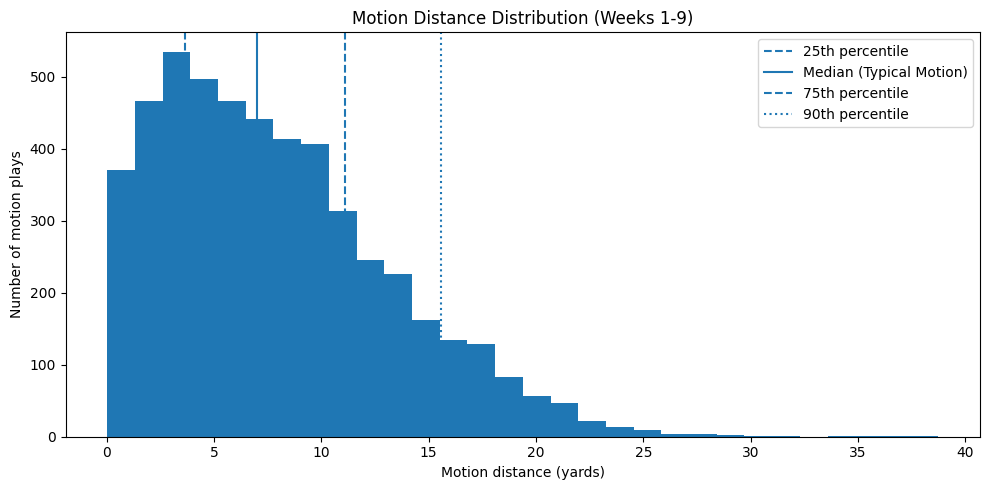

In [38]:
# now graphing it
plt.figure(figsize=(10,5))

plt.hist(MSFilt["motion_distance"].dropna(), bins=30)

# Context lines
plt.axvline(p25, linestyle="--", label="25th percentile")
plt.axvline(median, linestyle="-", label="Median (Typical Motion)")
plt.axvline(p75, linestyle="--", label="75th percentile")
plt.axvline(p90, linestyle=":", label="90th percentile")

plt.xlabel("Motion distance (yards)")
plt.ylabel("Number of motion plays")
plt.title(f"Motion Distance Distribution (Weeks {start_wk}-{end_wk})")

plt.legend()
plt.tight_layout()
plt.show()

In [39]:
# refining stats and giving context for defenders moved
vals = MSFilt["num_defenders_moved_gt"].dropna()
medianDef = int(vals.median())
count_median = int((vals == medianDef).sum())
total = int(vals.shape[0])

medianDef, count_median, total

(2, 863, 5055)

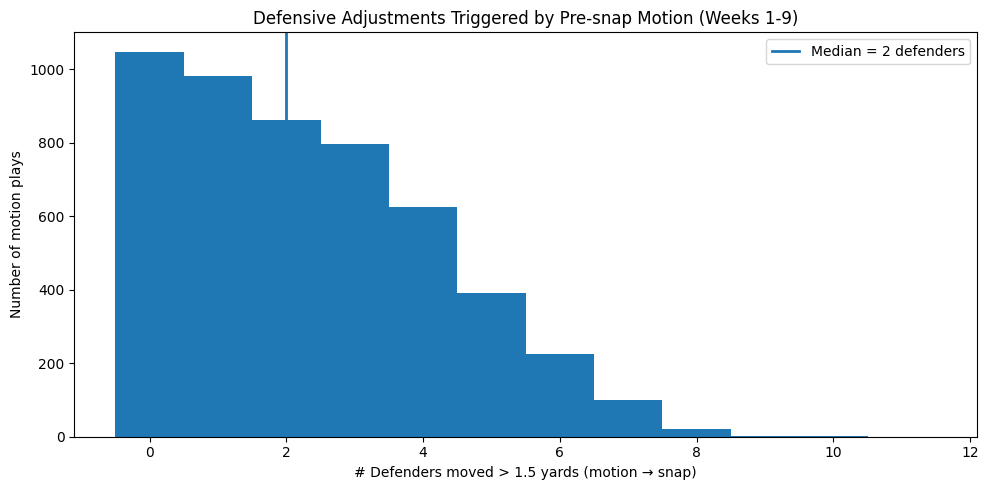

In [40]:
# plot defenders moved histogram
plt.figure(figsize=(10,5))

plt.hist(vals, bins=range(0,13), align="left")

# median reference line
plt.axvline(
    medianDef,
    linestyle="-",
    linewidth=2,
    label=f"Median = {medianDef} defenders"
)

plt.xlabel("# Defenders moved > 1.5 yards (motion → snap)")
plt.ylabel("Number of motion plays")
plt.title(f"Defensive Adjustments Triggered by Pre-snap Motion (Weeks {start_wk}-{end_wk})")

plt.legend()
plt.tight_layout()
plt.show()

In [41]:
# Based on the above image, on a normal pre snap motion play 2 defenders moved 1.5 yards, and this happened
# just over 800 times 
# so typically you get 2 defenders to move 1.5 yards with pre-snap motion
# now compounding off that lets find, which motion distance would get atleast 2 defenders to move
# so how much motion is required for a defense to adjust

# make defenses shifted greater than or equal to 2 defenders and 1.5 yards a binary outcome
df = MotionSummaryAll.copy()
df["DefenseAdjusted2"] = (df["num_defenders_moved_gt"] >=2).astype(int)

# Bin motion distance 
BinWidth = 1.0
MaxD = np.nanpercentile(df["motion_distance"], 99)  # avoiding the extreme tail ends
df2 = df[df["motion_distance"].notna() & (df["motion_distance"] <= MaxD)].copy()
df2["DistBin"] = (df2["motion_distance"] / BinWidth).apply(np.floor) * BinWidth


In [42]:
# compute rate by bin & plot
BinStats = (
    df2.groupby("DistBin")["DefenseAdjusted2"]
    .agg(rate = "mean", n = "size")
    .reset_index()
)

# only keep bins with enough plays
BinStats = BinStats[BinStats["n"] >= 40].copy()

#cutoff after 13 yards
BinStats = BinStats[BinStats["DistBin"] <= 13].copy()

# Shade region over 50%
threshold_prob = 0.5

above_threshold = BinStats["rate"] >= threshold_prob

# where motion yards crosses 50%
x = BinStats["DistBin"].to_numpy()
y = BinStats["rate"].to_numpy()

cross_x = None
for i in range(len(x) - 1):
    if (y[i] < threshold_prob and y[i+1] >= threshold_prob) or (y[i] > threshold_prob and y[i+1] <= threshold_prob):
        # interpolate between (x[i],y[i]) and (x[i+1],y[i+1])
        cross_x = x[i] + (threshold_prob - y[i]) * (x[i+1] - x[i]) / (y[i+1] - y[i])
        break

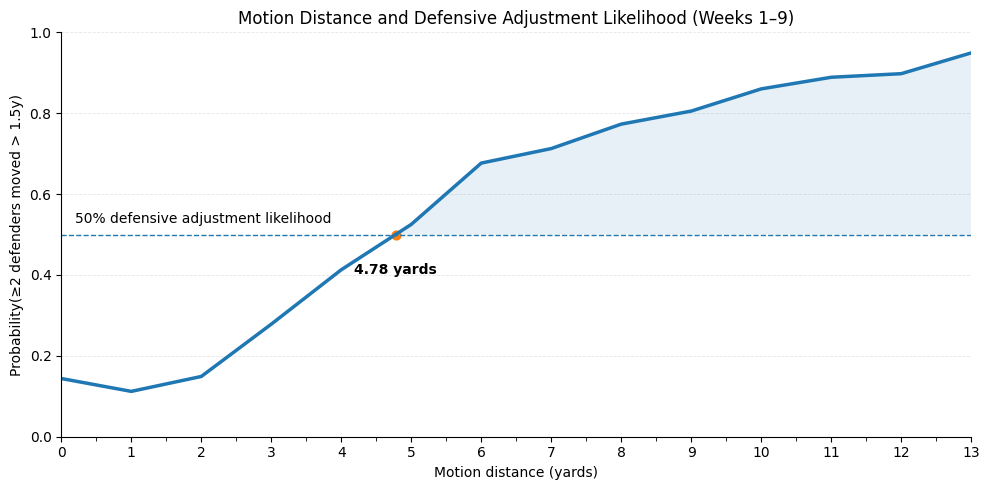

In [43]:
from matplotlib.ticker import MultipleLocator

plt.figure(figsize=(10,5))

# main curve
plt.plot(x, y, linewidth=2.5)

# 50% reference line
plt.axhline(threshold_prob, linestyle="--", linewidth=1)

# label the 50% line directly on the chart (instead of legend)
plt.text(
    0.2, threshold_prob + 0.02,
    "50% defensive adjustment likelihood",
    va="bottom"
)

# shaded region where adjustment is likely (>= 50%)
above = y >= threshold_prob
plt.fill_between(
    x, y, threshold_prob,
    where=above,
    interpolate=True,   
    alpha=0.11
)

# annotate the crossing point
if cross_x is not None:
    plt.scatter([cross_x], [threshold_prob], s=40)
    plt.text(
        cross_x,
        threshold_prob - 0.07,   
        f"{cross_x:.2f} yards",
        ha="center",            
        va="top",                
        fontweight="bold"
    )

plt.xlim(0, 13)
plt.ylim(0, 1.0)

plt.xlabel("Motion distance (yards)")
plt.ylabel("Probability(≥2 defenders moved > 1.5y)")
plt.title("Motion Distance and Defensive Adjustment Likelihood (Weeks 1–9)")

# more x-axis intervals: major=1 yard, minor=0.5 yard
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.grid(
    axis="y",
    linestyle="--",
    linewidth=0.6,
    alpha=0.3
)

ax.set_axisbelow(True)  # grid behind data
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.tick_params(axis="x", which="minor", length=3)

plt.tight_layout()
plt.show()

In [ ]:
# save to folder
MotionSummaryAll.to_csv(DATA_PROCESSED / "MotionSummaryWeeks_1_9.csv",index=False)